<center>
    <h1>
        <font color="blue">Métodos Númericos</font>
    </h1>
    <h3>
        Trabalho 4 - Interpolação e Ajuste de Curvas
    </h3>
    <h3>
        <div style="text-align: right;">
            Carlos Eduardo Cassimiro (402714)
        </div>
    </h3>
    <h2>
        Relatório
    </h2>
</center>

==============================================================================================================

#### Sumário:
1. Métodos
2. Execução dos Testes <br>
2.1 Funções <br>
2.2 Testes na Função 1 ($y = 10x$)<br>
2.3 Testes na Função 2 ($y = 0.3x^2+5x+10$) <br>
2.4 Testes na Função 3 ($y =0.006x^4+0.017x^3-0.345x^2-0.421x+1.115$) <br>
2.5 Estimativa dos Erros <br>
3. Comparações os Métodos  <br>
3.1 Comparação para Função 1 <br>
3.2 Comparação para Função 2 <br>
3.3 Comparação para Função 2 <br>
4. Conclusão

==============================================================================================================

## 1. Métodos

Interpolação é o método de aproximar os valores dos conjuntos discretos, permitindo construir um novo conjunto de dados a partir de um conjunto discreto de dados pontuais previamente conhecidos. Existem diversos métodos que buscam realizar a interpolação de diferentes formas. Nesse trabalho iremos testar e avaliar o desempenho e diferenças entres alguns deles.

In [1]:
# Módulos utilizados
import datetime                       # Datetime para utilizar as funções de tempo para regristro desempenho.
import pandas                         # Pandas para organizar e exportor os resultados de forma mais legível.
import matplotlib.pyplot as mtplot    # Matplotlib.pyplot para exibir o desempenho visualmete de tempo dos métodos.
import matplotlib.image as mpimg      # Matplotlib.image para exibir uma imagem de fora do arquivo .ipynb

#### Método da Interpolação Linear Simples

In [2]:
#Função para encontrar a posição do vetor no intervalo do x desejado
def proc_intervalo(x,n):
    v=[]
    k=0
    for m in n:
        for i in range(k,len(x)):
            if m < x[i]:
                v.append([i-1,i])
                k=i
                break
    return v

def interpolacao_linear_simples(x,y,n):
    sol = []
    v_intl = proc_intervalo(x,n)
    for i in range(0,len(v_intl)):
        x0,x1 = v_intl[i][0],v_intl[i][1]
        y0,y1 = y[x0],y[x1]
        x0,x1 = x[x0],x[x1]
        sol.append(y0 + ((y1-y0)*((n[i]-x0)/(x1-x0))))
    return sol

O método da Interpolação Linear Simples é um dos métodos mais simples (como o nome remete) para interpolação de pontos, onde a interpolante linear é a distância entre os dois pontos. <br>
Este método consiste em cálcular a distância entre dois pontos em que o ponto desejado para interpolar esteja nesse intervalo, dessa maneira, calculando a interpolação através da proporção dessa distância. Como podemos ver na formúla:<br>
<center>$ \frac{y-y0}{y1-y0} = \frac{x-x0}{x1-x0} → y = y0+(y1-y0) \frac{x-x0}{x1-x0} $ </center>
Podemos ver que a precisão de interpolação desse método depende muito da resolução/distância dos pontos para funções não-lineares. Para esse método, é necessário saber as coordenadas dos pontos de menor intervalo onde o valor desejado se encontra, dessa maneira, faz-se necessário um algoritmo de busca, que pode também pode ser implementado com baseando-se nas estratégia de outros algoritmos de ordenação. Para esse método foi utilizado um algoritmo de busca simples. <br>
Para uma análise axintótica do algoritmo implementado, podemos ver que a sua complexidade consiste em $O(2n)$.

#### Método da Interpolação Spline Linear

In [3]:
def spline_linear(x,y,n):
    sol = []
    v_intl = proc_intervalo(x,n)
    for i in range(0,len(v_intl)):
        x0,x1 = v_intl[i][0],v_intl[i][1]
        y0,y1 = y[x0],y[x1]
        x0,x1 = x[x0],x[x1]
        sol.append((((n[i]-x1)/(x0-x1))*y0)+(((n[i]-x0)/(x1-x0))*y1))
    return sol

O método da interpolação por Spline Linear consiste em conectar os pontos por linhas retas através de uma função linear, semelhante ao método anterior. Para calcular a linha reta, o Spline Linear utiliza a forma Lagrange para cada par de coordenada que onde o valor desejado para interpolar esteja no intervalo. Usando a forma de Lagrange, a equação da linha reta que conecta os dois primeiros pontos é dada por: <br>
<center>$f1(x) = \frac{x-x2}{x1-y2}y1 + \frac{x-x1}{x2-x1}y2 $ </center>
De forma análoga ao método da interpolação Linear Simples, o Spline Linear Também utiliza um algoritmo de busca para encontrar os indices das referidas coordenadas e também sua precisão a precisão de interpolaçãodepende muito da distância entre os pontos. Para essa implementação foi utilizado mesmo método de busca da Interpolação Simples. <br>
Para uma análise axintótica do algoritmo implementado, podemos ver que a sua complexidade consiste em $O(2n)$.

#### Método da Interpolalção de Lagrange

In [4]:
def interpolacao_lagrange(x,y,n):
    sol = [0]*len(n)
    for k in range(0,len(n)):
        for i in range(0,len(x)):
            dividendo = 1
            divisor = 1
            for j in range(0,len(x)):
                if i != j :
                    dividendo *= (n[k]-x[j])
                    divisor *= (x[i]-x[j])
            sol[k]+= (dividendo*y[i])/divisor
    return sol

O método da interpolação com os polinômios Lagrange é um método que utiliza vários polinômios calculados a partir das coordenadas de cada intervalo e realiza o cálculo da interpolação considerando os polinômios de outros intervalos. Por calcular a interporlação considerando os polinômios dos outros intervalos, o seu resultado pode ser muito mais preciso do que outros métodos lineares para funções não-lineares e com intervalos mais distantes. A fórmula geral de um polinômio de Lagrange de ordem n–1 que passe por n pontos $(x1,y1),(x2,y2),...,(xn,yn)$ é: <br>
<center>$f(x) = \frac{(x-x2)(x-x3)...(x-xn)}{(x1-x2)(x1-x3)...(x1-xn)}y1 + \frac{(x-x1)(x-x3)...(x-xn)}{(x2-x1)(x2-x3)...(x2-xn)}y2 + \frac{(x-x1)(x-x2)...(x-xn)}{(x3-x1)(x3-x2)...(x3-xn)}y3 +...+ \frac{(x-x1)(x-x2)...(x-xn-1)}{(xn-x1)(xn-x2)...(xn-xn-1)}yn$ </center>
Podemos ver que esse método possui uma complexidade maior aos outros métodos lineares anteiores, para uma análise axintótica do algoritmo implementado, podemos ver que a sua complexidade consiste em $O(nx^2)$, que pode ser considerado como $O(x^3)$.

#### Método da Interpolalção com os Polinômios de Newton

In [5]:
def polinomio_newton(x,y,a,b,polinom):
    if(a!=b):
        y1 = polinomio_newton(x,y,a,b-1,polinom)
        if(polinom[b-1]==b-1): polinom[b-1]=y1
        y2 = polinomio_newton(x,y,a+1,b,polinom)
        return (y2-y1)/(x[b]-x[a])
    else:
        return y[a]

def interpolacao_newton(x,y,n):
    a = list(range(0,len(x)))
    a[-1] = polinomio_newton(x,y,0,len(x)-1,a)
    sol = len(n)*[0]
    for j in range(0,len(n)):
        calc = 1
        for i in range(0,len(x)-1):
            calc *= (n[j]-x[i])
            sol[j] += a[i+1]*calc
        sol[j]+=a[0]
    return sol

O método dos polinômios interpoladores de Newton, assim como o de Lagrange, é um método que utiliza vários polinômios calculados a partir das coordenadas de cada intervalo e realiza o cálculo da interpolação considerando os polinômios de outros intervalos, oferecendo mais precisão que os métodos lineares para os diversos tipos de casos. Entretanto, o método de Newton define coeficientes que podem ser utilizados posteriormente para outro conjunto de dados que esteja dentro do intervalo do conjunto de dados que foi computado. <br>
Para a definição dos coeficientes, utiliza-se:

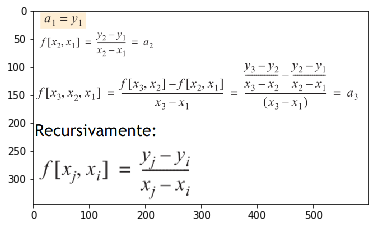

In [6]:
%matplotlib inline
img = mpimg.imread('newton.png')
mtplot.imshow(img)
mtplot.show()

Dados o coeficientes calculados, podemos calcular as interpolações por: <br>
<center>$ f(x)=a1 + a2(x-x1) + a3(x-x1)(x-x2) + ... + an(x-x1)...(x-xn) $</center>
Podemos ver que esse método também possui uma complexidade maior aos outros métodos lineares anteiores, para uma análise axintótica do algoritmo implementado, podemos ver que a sua complexidade consiste em $O(2n^2)$, entretanto, por conta de implementação de recursiva do cálculo dos coeficientes, o custo de mémoria é bem mais elevado que os outros métodos. Dado os coeficientes cálculados, o cálculo da interpoalção de um novo ponto é $O(1)$ e para mais de um ponto $O(n)$.

## 2. Execução dos Testes

Para verificar a efetividade, desempenho e caracteristicas dos métodos, serão utilizadas três resoluções(distância entre os pontos) com três diferentes funções: uma linear; uma de segundo grau e outra de quarto grau. 

### 2.1 Funções
#### Função 1 ($y = 10x$)<br>

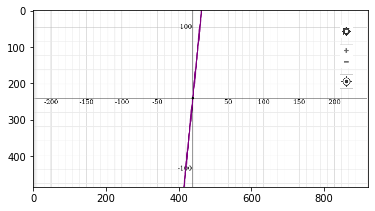

In [7]:
%matplotlib inline
img = mpimg.imread('f1.png')
mtplot.imshow(img)
mtplot.show()

#### Função 2 ($y = 0.3x^2+5x+10$) <br>

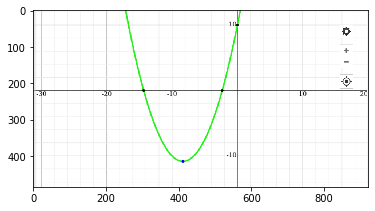

In [8]:
%matplotlib inline
img = mpimg.imread('f2.png')
mtplot.imshow(img)
mtplot.show()

#### Função 3 ($y =0.006x^4+0.017x^3-0.345x^2-0.421x+1.115$) <br>

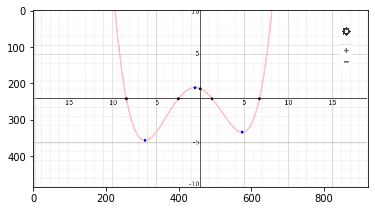

In [9]:
%matplotlib inline
img = mpimg.imread('f3.png')
mtplot.imshow(img)
mtplot.show()

#### Vetores correspondentes a função de teste $y = 10x$

In [10]:
x1_1 = list(range(0,21))
y1_1 = [x*10 for x in x1_1]

x1_2 = list(range(0,21,3))
y1_2 = [x*10 for x in x1_2]

x1_3 = list(range(0,21,4))
y1_3 = [x*10 for x in x1_3]

n1 = [5.5, 13.01, 17.009]

#### Vetores correspondentes a função de teste $y = 0.3x^2+5x+10$

In [11]:
f1 = lambda x: 0.3*(x**2)+5*x+10

x2_1 = list(range(-20,0))
y2_1 = [f1(x) for x in x2_1]

x2_2 = list(range(-20,0,3))
y2_2 = [f1(x) for x in x2_2]

x2_3 = list(range(-20,0,4))
y2_3 = [f1(x) for x in x2_3]

n2 = [-17.25, -12.07, -6.008]

#### Vetores correspondentes a função de teste $y =0.006x^4+0.017x^3-0.345x^2-0.421x+1.115$

In [12]:
# Resolução Maior
f2 = lambda x: 0.006*(x**4)+0.017*(x**3)-0.345*(x**2)-0.421*x+1.115
x3_1 = [a for a in list(range(-9,6))]
y3_1 = [f2(a) for a in x3_1]

# Resolução Menor 1
x3_2 = [a/100 for a in list(range(-900,600,175))]
y3_2 = [f2(a) for a in x3_2]

# Resolução Menor 2
x3_3 = [a/100 for a in list(range(-900,600,250))]
y3_3 = [f2(a) for a in x3_3]

n3 = [-8.5, -2.35, 2.007]

In [13]:
# Alocação dos vetores para automatizar os testes
x = [[x1_1,x1_2,x1_3],[x2_1,x2_2,x2_3],[x3_1,x3_2,x3_3]]
y = [[y1_1,y1_2,y1_3],[y2_1,y2_2,y2_3],[y3_1,y3_2,y3_3]]
n = [n1,n2,n3]

### 2.2 Testes

In [14]:
# Vetores para alocar os resultados dos métodos
resp_linear_simples = [[],[],[]]
resp_spline_linear = [[],[],[]]
resp_lagrange = [[],[],[]]
resp_newton = [[],[],[]]

# Vetores para alocar os tempos desenvolvidos pelos algoriitmos
tempo_linear_simples = [[],[],[]]
tempo_spline_linear = [[],[],[]]
tempo_lagrange = [[],[],[]]
tempo_newton = [[],[],[]]

# Laço para executar todos os testes nas funções e registrar os tempos
for i in range(0,len(n)):
    for j in range(0,len(n)):
        inicio = datetime.datetime.now() # Registro do tempo inicial antes da execução do método
        # Aplicação do Método em todos as funções
        resp_linear_simples[i].append(interpolacao_linear_simples(x[i][j], y[i][j], n[i]))
        fim = datetime.datetime.now() # Registro do tempo final da execução
        #Diferença entre o valor de tempo final e inicial em segundos
        tempo_linear_simples[i].append((fim - inicio).total_seconds())

        inicio = datetime.datetime.now()
        resp_spline_linear[i].append(spline_linear(x[i][j], y[i][j], n[i]))
        fim = datetime.datetime.now()
        tempo_spline_linear[i].append((fim - inicio).total_seconds())

        inicio = datetime.datetime.now()
        resp_lagrange[i].append(interpolacao_lagrange(x[i][j], y[i][j], n[i]))
        fim = datetime.datetime.now()
        tempo_lagrange[i].append((fim - inicio).total_seconds())

        inicio = datetime.datetime.now()
        resp_newton[i].append(interpolacao_newton(x[i][j], y[i][j], n[i]))
        fim = datetime.datetime.now()
        tempo_newton[i].append((fim - inicio).total_seconds())

### 2.3 Estimativa dos Erros

In [15]:
r_func1 = [a*10 for a in n[0]]
r_func2 = [f1(a) for a in n[1]]
r_func3 = [f2(a) for a in n[2]]

erroabs1_linear_simples = [[],[],[]]
erroabs1_spline_linear = [[],[],[]]
erroabs1_lagrange = [[],[],[]]
erroabs1_newton = [[],[],[]]

erroabs2_linear_simples = [[],[],[]]
erroabs2_spline_linear = [[],[],[]]
erroabs2_lagrange = [[],[],[]]
erroabs2_newton = [[],[],[]]

erroabs3_linear_simples = [[],[],[]]
erroabs3_spline_linear = [[],[],[]]
erroabs3_lagrange = [[],[],[]]
erroabs3_newton = [[],[],[]]

c_erro = (lambda x,y: abs(abs(x)-abs(y)))
media_erro = lambda x: sum(x)/len(x)

for i in range(0,len(n)):
    erroabs1_linear_simples[i].append([c_erro(x,y) for x,y in zip(r_func1,resp_linear_simples[0][i])])
    erroabs1_spline_linear[i].append([c_erro(x,y) for x,y in zip(r_func1,resp_spline_linear[0][i])])
    erroabs1_lagrange[i].append([c_erro(x,y) for x,y in zip(r_func1,resp_lagrange[0][i])])
    erroabs1_newton[i].append([c_erro(x,y) for x,y in zip(r_func1,resp_newton[0][i])])
    
    erroabs1_linear_simples[i] = media_erro(erroabs1_linear_simples[i][0])
    erroabs1_spline_linear[i] = media_erro(erroabs1_spline_linear[i][0])
    erroabs1_lagrange[i] = media_erro(erroabs1_lagrange[i][0])
    erroabs1_newton[i] = media_erro(erroabs1_newton[i][0])
    
for i in range(0,len(n)):
    erroabs2_linear_simples[i].append([c_erro(x,y) for x,y in zip(r_func2,resp_linear_simples[1][i])])
    erroabs2_spline_linear[i].append([c_erro(x,y) for x,y in zip(r_func2,resp_spline_linear[1][i])])
    erroabs2_lagrange[i].append([c_erro(x,y) for x,y in zip(r_func2,resp_lagrange[1][i])])
    erroabs2_newton[i].append([c_erro(x,y) for x,y in zip(r_func2,resp_newton[1][i])])
    
    erroabs2_linear_simples[i] = media_erro(erroabs2_linear_simples[i][0])
    erroabs2_spline_linear[i] = media_erro(erroabs2_spline_linear[i][0])
    erroabs2_lagrange[i] = media_erro(erroabs2_lagrange[i][0])
    erroabs2_newton[i] = media_erro(erroabs2_newton[i][0])
    
for i in range(0,len(n)):
    erroabs3_linear_simples[i].append([c_erro(x,y) for x,y in zip(r_func3,resp_linear_simples[2][i])])
    erroabs3_spline_linear[i].append([c_erro(x,y) for x,y in zip(r_func3,resp_spline_linear[2][i])])
    erroabs3_lagrange[i].append([c_erro(x,y) for x,y in zip(r_func3,resp_lagrange[2][i])])
    erroabs3_newton[i].append([c_erro(x,y) for x,y in zip(r_func3,resp_newton[2][i])])
    
    erroabs3_linear_simples[i] = media_erro(erroabs3_linear_simples[i][0])
    erroabs3_spline_linear[i] = media_erro(erroabs3_spline_linear[i][0])
    erroabs3_lagrange[i] = media_erro(erroabs3_lagrange[i][0])
    erroabs3_newton[i] = media_erro(erroabs3_newton[i][0])
            

In [16]:
# Calculando a média dos tempos
media = lambda x: sum(x)/len(x)

mediat_linear_simples = []
mediat_spline_linear = []
mediat_lagrange = []
mediat_newton = []

for i in range(0,len(n)):
    mediat_linear_simples.append(media(tempo_linear_simples[i]))
    mediat_spline_linear.append(media(tempo_spline_linear[i]))
    mediat_lagrange.append(media(tempo_lagrange[i]))
    mediat_newton.append(media(tempo_newton[i]))

## 3. Comparações os Métodos
### 3.1 Comparação para a Função 1 ($y = 10x$)
#### Gráfico dos Tempos

<IPython.core.display.Javascript object>


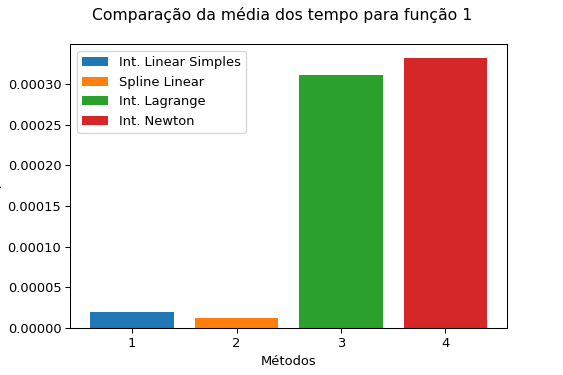

In [31]:
%matplotlib notebook
mtplot.figure(1)
mtplot.suptitle("Comparação da média dos tempo para função 1")
mtplot.bar(['1'],mediat_linear_simples[0])
mtplot.bar(['2'],mediat_spline_linear[0])
mtplot.bar(['3'],mediat_lagrange[0])
mtplot.bar(['4'],mediat_newton[0]/1000)
mtplot.ylabel("Tempo(s)")
mtplot.xlabel("Métodos")
mtplot.legend(['Int. Linear Simples','Spline Linear','Int. Lagrange','Int. Newton'])
mtplot.show()

Obs.1: Para a plotagem desse gráfico foram realizadas as médias dos tempo de cada método entre as 3 diferentes resoluções.<br>
Obs.2: O tempo do método de Newton foi divido por 1000 para que pudesse ser plotado no gráfico e mostrar a diferença de tempo entre os métodos.

#### Resultados das Interpolações

In [18]:
pandas.DataFrame([resp_linear_simples[0],resp_spline_linear[0],resp_lagrange[0],resp_newton[0]], columns=['Rel.Alta','Rel.Média','Rel.Baixa'], index=["Linear Simples","Spline Linear","Lagrange","Newton"])

,Rel.Alta,Rel.Média,Rel.Baixa
Linear Simples,"[55.0, 130.1, 170.09]","[55.0, 130.1, 170.09]","[55.0, 130.1, 170.09]"
Spline Linear,"[55.0, 130.1, 170.09]","[55.0, 130.1, 170.09]","[55.0, 130.1, 170.09]"
Lagrange,"[55.000000000000014, 130.09999999999994, 170.0...","[55.0, 130.1, 170.08999999999997]","[55.0, 130.10000000000002, 170.09]"
Newton,"[55.0, 130.1, 170.09]","[55.0, 130.1, 170.09]","[55.0, 130.1, 170.09]"


#### Média Erro Absoluto

In [19]:
pandas.DataFrame([erroabs1_linear_simples,erroabs1_spline_linear,erroabs1_lagrange,erroabs1_newton], columns=['Rel.Alta','Rel.Média','Rel.Baixa'], index=["Linear Simples","Spline Linear","Lagrange","Newton"])

,Rel.Alta,Rel.Média,Rel.Baixa
Linear Simples,0.000000e+00,0.000000e+00,0.000000e+00
Spline Linear,0.000000e+00,0.000000e+00,0.000000e+00
Lagrange,3.315866e-14,9.473903e-15,9.473903e-15
Newton,0.000000e+00,0.000000e+00,0.000000e+00


#### Tempos

In [20]:
pandas.DataFrame([tempo_linear_simples[0],tempo_spline_linear[0],tempo_lagrange[0],tempo_newton[0]], columns=['Rel.Alta','Rel.Média','Rel.Baixa'], index=["Linear Simples","Spline Linear","Lagrange","Newton"])

,Rel.Alta,Rel.Média,Rel.Baixa
Linear Simples,0.000027,0.000020,0.000012
Spline Linear,0.000014,0.000013,0.000011
Lagrange,0.000782,0.000086,0.000064
Newton,0.996554,0.000082,0.000049


Aplicando os métodos na primeira função, podemos ver primeiramete a discrepância de tempo médio entre os métodos, onde os métodos lineares oferecem um custo baixíssimo em relação ao métodos com mais de um polinômio, para funções lineares. Entretanto, analisando a tabela com os tempos em cada resolução, vemos que a causa da discrepancia dos demais tempos com o método de Newton se deu pelo seu tempo na resolução alta. <br>
Todos os métodos convergiram sua interpolação para o valor esperado(calculado com a referida função) com exceção de Lagrange que apresentou um erro absoluto médio na casa decimal dos $10^-15$. <br>
Desconsiderando o tempo de Newton para o teste com a distância pequena entre os pontos, podemos ver que ele também desempenhou um ótimo tempo, e considerando os erros absolutos do outro método com polinômios, se saiu melhor que o método de Lagrange pelo tanto pelos outros tempos quanto ter encontrado o valor exato. Entretanto, podemos ver que para valores de funções lineares, os métodos lineares são realmente melhores, e entre os dois métodos testados o de Spline Linear se sai melhor por conta do tempo. <br>

### 3.2 Comparação para a Função 2 ($y = 0.3x^2+5x+10$)
#### Gráfico dos Tempos

<IPython.core.display.Javascript object>


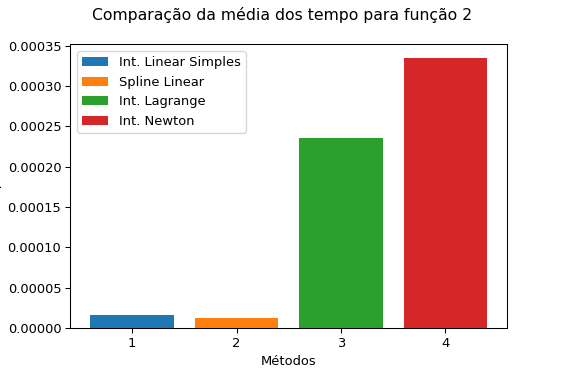

In [32]:
%matplotlib notebook
mtplot.figure(2)
mtplot.suptitle("Comparação da média dos tempo para função 2")
mtplot.bar(['1'],mediat_linear_simples[1])
mtplot.bar(['2'],mediat_spline_linear[1])
mtplot.bar(['3'],mediat_lagrange[1])
mtplot.bar(['4'],mediat_newton[1]/500)
mtplot.ylabel("Tempo(s)")
mtplot.xlabel("Métodos")
mtplot.legend(['Int. Linear Simples','Spline Linear','Int. Lagrange','Int. Newton'])
mtplot.show()

Obs.1: Para a plotagem desse gráfico foram realizadas as médias dos tempo de cada método entre as 3 diferentes resoluções.<br>
Obs.2: O tempo do método de Newton foi divido por 500 para que pudesse ser plotado no gráfico e mostrar a diferença de tempo entre os métodos.

#### Resultados das Interpolações

In [22]:
pandas.DataFrame([resp_linear_simples[1],resp_spline_linear[1],resp_lagrange[1],resp_newton[1]], columns=['Rel.Alta','Rel.Média','Rel.Baixa'], index=["Linear Simples","Spline Linear","Lagrange","Newton"])

,Rel.Alta,Rel.Média,Rel.Baixa
Linear Simples,"[13.075000000000003, -6.6250000000000036, -9.2...","[13.225000000000005, -6.025000000000002, -8.6088]","[14.049999999999997, -6.562000000000003, -8.0112]"
Spline Linear,"[13.075000000000003, -6.6250000000000036, -9.2...","[13.225000000000001, -6.025000000000001, -8.6088]","[14.049999999999997, -6.562000000000003, -8.0112]"
Lagrange,"[13.018750000000013, -6.644530000000004, -9.21...","[13.01875, -6.644530000000001, -9.2111808]","[13.018749999999999, -6.644530000000004, -9.21..."
Newton,"[13.018750000000004, -6.644530000000003, -9.21...","[13.018750000000004, -6.644530000000003, -9.21...","[13.018749999999997, -6.644530000000003, -9.21..."


#### Média Erro Absoluto

In [23]:
pandas.DataFrame([erroabs2_linear_simples,erroabs2_spline_linear,erroabs2_lagrange,erroabs2_newton], columns=['Rel.Alta','Rel.Média','Rel.Baixa'], index=["Linear Simples","Spline Linear","Lagrange","Newton"])

,Rel.Alta,Rel.Média,Rel.Baixa
Linear Simples,2.605360e-02,4.760536e-01,7.712536e-01
Spline Linear,2.605360e-02,4.760536e-01,7.712536e-01
Lagrange,8.585725e-15,2.368476e-15,8.881784e-16
Newton,4.736952e-15,2.368476e-15,4.736952e-15


#### Tempos

In [24]:
pandas.DataFrame([tempo_linear_simples[1],tempo_spline_linear[1],tempo_lagrange[1],tempo_newton[1]], columns=['Rel.Alta','Rel.Média','Rel.Baixa'], index=["Linear Simples","Spline Linear","Lagrange","Newton"])

,Rel.Alta,Rel.Média,Rel.Baixa
Linear Simples,0.000015,0.000022,0.000012
Spline Linear,0.000013,0.000013,0.000012
Lagrange,0.000573,0.000087,0.000048
Newton,0.502060,0.000083,0.000032


No segundo teste com a função de segundo grau, novamente vemos que a média dos tempos do método de Newton se elevevou em relação aos demais por conta do teste com a resolução alta. <br>
Embora os tempos dos métodos lineares tenham sido os mais rápidos, eles apresentaram um erro absoluto médio bem alto em relação ao outros dos métodos. O método de Newton apresentou resultados mais precisos do que o método de Lagrange para a resoluação alta, entretanto, para a resolução mais baixa o método de Lagrande obteve uma precisão de uma casa decimal a menos nas média dos erros absolutos.

### 3.3 Comparação para a Função 3 ($y =0.006x^4+0.017x^3-0.345x^2-0.421x+1.115$)
#### Gráfico dos Tempos

<IPython.core.display.Javascript object>


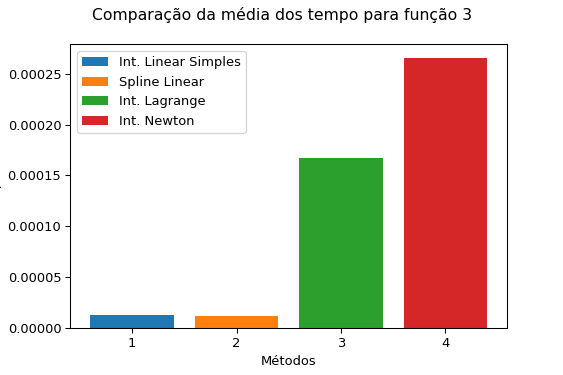

In [33]:
%matplotlib notebook
mtplot.figure(3)
mtplot.suptitle("Comparação da média dos tempo para função 3")
mtplot.bar(['1'],mediat_linear_simples[2])
mtplot.bar(['2'],mediat_spline_linear[2])
mtplot.bar(['3'],mediat_lagrange[2])
mtplot.bar(['4'],mediat_newton[2]/20)
mtplot.ylabel("Tempo(s)")
mtplot.xlabel("Métodos")
mtplot.legend(['Int. Linear Simples','Spline Linear','Int. Lagrange','Int. Newton'])
mtplot.show()

Obs.1: Para a plotagem desse gráfico foram realizadas as médias dos tempo de cada método entre as 3 diferentes resoluções.<br>
Obs.2: O tempo do método de Newton foi divido por 20 para que pudesse ser plotado no gráfico e mostrar a diferença de tempo entre os métodos.

#### Resultados das Interpolações

In [26]:
pandas.DataFrame([resp_linear_simples[2],resp_spline_linear[2],resp_lagrange[2],resp_newton[2]], columns=['Rel.Alta','Rel.Média','Rel.Baixa'], index=["Linear Simples","Spline Linear","Lagrange","Newton"])

,Rel.Alta,Rel.Média,Rel.Baixa
Linear Simples,"[1.1035000000000017, 0.1040500000000002, -0.88...","[1.7033593750000016, 0.0560453125, -0.91171046...","[2.2090000000000023, -0.15027499999999971, -0...."
Spline Linear,"[1.1035000000000017, 0.10405000000000009, -0.8...","[1.7033593750000013, 0.05604531249999989, -0.9...","[2.2090000000000023, -0.15027499999999971, -0...."
Lagrange,"[0.6474999999999969, 0.16145166250000006, -0.8...","[0.647499999999997, 0.16145166249999973, -0.88...","[0.6475000000000015, 0.16145166250000023, -0.8..."
Newton,"[0.6475000000000168, 0.16145166249999665, -0.8...","[0.6474999999999964, 0.16145166249999976, -0.8...","[0.6475000000000022, 0.1614516625000002, -0.88..."


#### Média Erro Absoluto

In [27]:
pandas.DataFrame([erroabs3_linear_simples,erroabs3_spline_linear,erroabs3_lagrange,erroabs3_newton], columns=['Rel.Alta','Rel.Média','Rel.Baixa'], index=["Linear Simples","Spline Linear","Lagrange","Newton"])

,Rel.Alta,Rel.Média,Rel.Baixa
Linear Simples,1.711976e-01,3.960455e-01,5.520513e-01
Spline Linear,1.711976e-01,3.960455e-01,5.520513e-01
Lagrange,2.766306e-15,2.673787e-15,1.230497e-15
Newton,1.028807e-14,4.810966e-15,1.998401e-15


#### Tempos

In [28]:
pandas.DataFrame([tempo_linear_simples[2],tempo_spline_linear[2],tempo_lagrange[2],tempo_newton[2]], columns=['Rel.Alta','Rel.Média','Rel.Baixa'], index=["Linear Simples","Spline Linear","Lagrange","Newton"])

,Rel.Alta,Rel.Média,Rel.Baixa
Linear Simples,0.000015,0.000013,0.000011
Spline Linear,0.000013,0.000012,0.000011
Lagrange,0.000323,0.000118,0.000061
Newton,0.015616,0.000260,0.000053


Na terceira função com quarto e terceiro grau, novamente o método de Newton teve o tempo médio elevao por conta do tempo no teste com maior resolução dos ponto e novamente os métodos lineares apresentaram os maiores erros absolutos médios. <br>
Dos métodos de multiplos polonômios, o método de Lagrange demostrou melhores tempo e resultados mais precisos. 

## 4. Conclusão

#### Considerações sobre implementações e testes
Existem erros associados as medições de tempo de associados ao Jupyter Notebook que não interpreta diretamente o código python, onde em outra execução o método de Newton demorou mais tempo do que o último teste aqui registrado. <br>
Existe uma incompletude nos testes associada a consideção de médias. A decisão dessa consideração se deu ao fato de foram muitos testes computados e considerar cada caso em particular extenderia muito mais o relatório e acredito que pouquissímos achados interessantes poderiam aparecer em uma análise mais meticulosa. <br>
O método de Newton apresentou uma razoável dificuldade para implementá-lo de forma interativa e evitar vários recálculos, por conta disso, optei por implementar com uma estrátegia recursiva. Algoritmo recursivos demandam mais memória por conta dos processos empilhados e isso pode ser ainda mais custoso utilizando o Jupyter Notebook. <br>
#### Considerções sobre os algoritmos
Com base nos testes realizados e com as considerações obtidas através dos resultdos resultados e da análise da natureza dos algoritmos, podemos perceber os métodos lineares só funcionam bem realmente para funções lineares por conta da sua precisão para funções não-lineares e que os métodos com multiplos polinômios, embora levem mas tempo de execução, a precisão dos resultados associados a estes é bem alta comparada aoos métodos lineares. <br> Dependendo da necissidade de precisão necessária para dado problema e a resoluação do conjunto de dandos, os métodos lineares podem ser utilizados para funções de até segundo grau. <br>
Quando aos métodos de multiplos polinômios, o método da interpolação de Lagrange foi o que apresentou os melhores resultados em relação custo-benefício para tempo-pecisão em termos mais gerais. Podemos observar que na terceira função (mais complexa) o método de Lagrange apresentou os melhores resultados nas métricas consideradas e também apresentou a menor complexidade para implementação, tornando a sua utilização mais prática. <br>
Apesar do método de Newton, sob a implementação feita, os testes e as métricas consideradas, ter parecido menos vantajoso que o método de Lagrange, ele possui a caracteristica de poder ser utilizado para outros conjuntos de pontos desde que estejam dentro do intervalo já calculado. Tal característica, de poder reutilizar os coeficientes já calculados, quando utilizada, amortiza o custo computacional inicial e tornando bastante eficiente em determinadas aplicações.